<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Importing Packages and Modules
</div>

In [1]:
!pip install pmdarima
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from scipy.stats import chi2

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Reading Data
</div>

In [3]:
data=pd.read_csv('/kaggle/input/time-series-file/2018.csv')

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Data Preprocessing
</div>

In [4]:
data=data.drop('date',axis=1).set_index(pd.to_datetime(data['date'],dayfirst=True))

In [5]:
ftse_data=data['ftse']

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Exploratory Data Analysis
</div>

In [6]:
addata=sts.adfuller(ftse_data)
labels=['Test Statistics','P value','No of Lags Used','No of Rows Used','Critical Values','Information Criteria']
pd.Series(index=labels,data=addata)

Test Statistics                                                 -1.594282
P value                                                          0.486465
No of Lags Used                                                         6
No of Rows Used                                                      6262
Critical Values         {'1%': -3.4313947113763845, '5%': -2.862001669...
Information Criteria                                         68396.517963
dtype: object

<Axes: xlabel='date'>

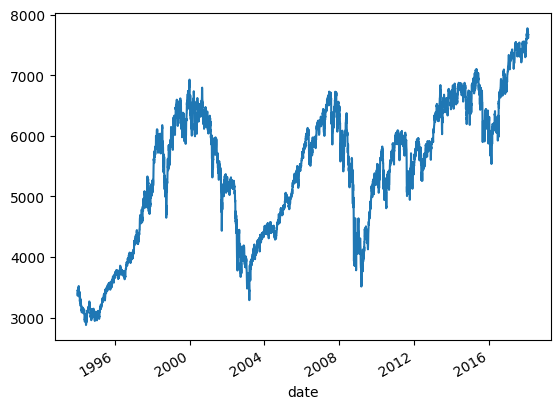

In [7]:
ftse_data.plot()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">EDA Using Returns
</div>

In [8]:
ftse_return=(ftse_data.pct_change(1)*100).iloc[1:]

In [9]:
sts.adfuller(ftse_return)

(-15.182022490939076,
 6.178382600319177e-28,
 34,
 6233,
 {'1%': -3.4313995740622145,
  '5%': -2.8620038184370746,
  '10%': -2.567016887640913},
 19014.128593790985)

<Axes: xlabel='date'>

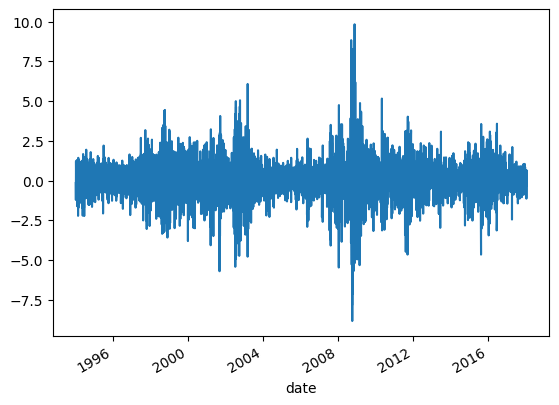

In [10]:
ftse_return.plot()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Autocorrelation Plots for Finding The Correct Parameter For Model
</div>

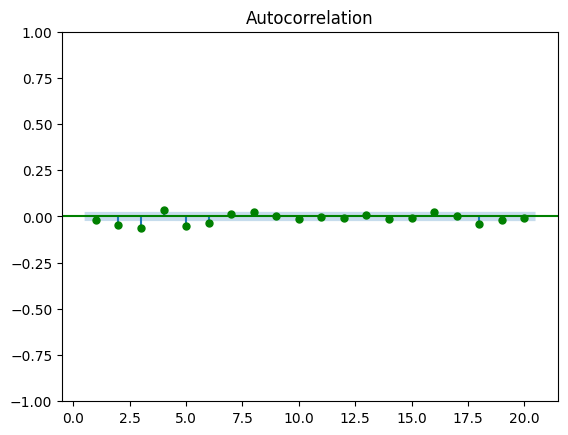

In [11]:
sgt.plot_acf(ftse_return,zero=False,lags=20,color='g')
plt.show()

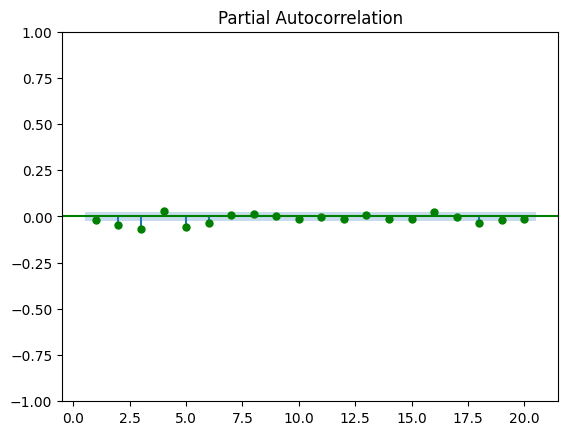

In [12]:
sgt.plot_pacf(ftse_return,zero=False,lags=20,color='g')
plt.show()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Modelling and Comparing Models
</div>


<font style="font-family:Georgia; font-size:120%;font-weight:bold;">
We Can Compare The Model By its Log Likelihood and Information Criteria</font>
<div></div>
<font style="font-family:Georgia; font-size:120%;font-weight:bold;">
Higher Log Likelihood</font>
<div></div>
<font style="font-family:Georgia; font-size:120%;font-weight:bold;">
Lower Information Criteria</font>
<div></div>
<font style="font-family:Georgia; font-size:120%;font-weight:bold;">
Less insignificant Coefficients are better models</font>

In [13]:
def model_fitting(p,d,q):
  model=ARIMA(ftse_return,order=(p,d,q))
  return model.fit()

In [14]:
model_5_0_6=model_fitting(5,0,6)

In [15]:
def summary(model):
  print(model.summary())

In [16]:
summary(model_5_0_6)

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(5, 0, 6)   Log Likelihood               -9545.437
Date:                Thu, 23 May 2024   AIC                          19116.874
Time:                        11:11:03   BIC                          19204.536
Sample:                             0   HQIC                         19147.249
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.013      1.467      0.142      -0.006       0.043
ar.L1         -0.2231      0.407     -0.548      0.583      -1.020       0.574
ar.L2         -0.5097      0.085     -5.972      0.0

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Log Likelihood Ratio Test (Used For Nested Model)
</div>


In [17]:
def LLR(model1,model2,DF):
  l1=model1.llf
  l2=model2.llf
  lh=(2*(l2-l1))
  p=chi2.sf(lh,DF)
  return p

In [18]:
model_5_0_5=model_fitting(5,0,5)
summary(model_5_0_5)

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -9545.445
Date:                Thu, 23 May 2024   AIC                          19114.891
Time:                        11:11:49   BIC                          19195.809
Sample:                             0   HQIC                         19142.929
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.012      1.530      0.126      -0.005       0.043
ar.L1         -0.1555      0.107     -1.455      0.146      -0.365       0.054
ar.L2         -0.4744      0.070     -6.731      0.0

In [19]:
LLR(model_5_0_5,model_5_0_6,1)

0.8971046508377598

In [20]:
model_4_0_5=model_fitting(4,0,5)
summary(model_4_0_5)

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(4, 0, 5)   Log Likelihood               -9545.625
Date:                Thu, 23 May 2024   AIC                          19113.251
Time:                        11:12:28   BIC                          19187.426
Sample:                             0   HQIC                         19138.953
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0197      0.013      1.558      0.119      -0.005       0.044
ar.L1          0.0952      0.078      1.222      0.222      -0.057       0.248
ar.L2         -0.5712      0.078     -7.348      0.0

In [21]:
model_5_0_4=model_fitting(5,0,4)
summary(model_5_0_4)

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -9546.281
Date:                Thu, 23 May 2024   AIC                          19114.563
Time:                        11:13:02   BIC                          19188.738
Sample:                             0   HQIC                         19140.265
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.013      1.470      0.142      -0.006       0.043
ar.L1          0.1828      0.081      2.262      0.024       0.024       0.341
ar.L2         -0.5749      0.082     -7.030      0.0

In [22]:
model_4_0_4=model_fitting(4,0,4)
summary(model_4_0_4)

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -9552.764
Date:                Thu, 23 May 2024   AIC                          19125.529
Time:                        11:13:17   BIC                          19192.961
Sample:                             0   HQIC                         19148.894
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.012      1.557      0.120      -0.005       0.043
ar.L1         -0.2280      0.161     -1.415      0.157      -0.544       0.088
ar.L2          0.0797      0.085      0.941      0.3

In [23]:
LLR(model_4_0_5,model_5_0_5,1)

0.5486016701461828

In [24]:
LLR(model_5_0_4,model_5_0_5,1)

0.19600298807878358

In [25]:
print(model_5_0_4.llf)
print(model_4_0_5.llf)


-9546.28135918766
-9545.625318608261


In [26]:
model_3_0_4=model_fitting(3,0,4)
summary(model_3_0_4)

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -9554.680
Date:                Thu, 23 May 2024   AIC                          19127.359
Time:                        11:13:49   BIC                          19188.048
Sample:                             0   HQIC                         19148.388
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.012      1.583      0.113      -0.005       0.043
ar.L1          0.2328      0.097      2.411      0.016       0.044       0.422
ar.L2          0.1400      0.079      1.768      0.0

In [27]:
model_4_0_3=model_fitting(4,0,3)
summary(model_4_0_3)

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(4, 0, 3)   Log Likelihood               -9554.194
Date:                Thu, 23 May 2024   AIC                          19126.387
Time:                        11:14:21   BIC                          19187.076
Sample:                             0   HQIC                         19147.416
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0191      0.012      1.584      0.113      -0.005       0.043
ar.L1          0.1416      0.092      1.543      0.123      -0.038       0.321
ar.L2          0.1817      0.073      2.475      0.0

In [28]:
model_3_0_3=model_fitting(3,0,3)
summary(model_3_0_3)

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -9556.518
Date:                Thu, 23 May 2024   AIC                          19129.036
Time:                        11:14:40   BIC                          19182.982
Sample:                             0   HQIC                         19147.728
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.518      0.129      -0.006       0.044
ar.L1         -0.1369      0.069     -1.975      0.048      -0.273      -0.001
ar.L2         -0.1867      0.056     -3.351      0.0

In [29]:
LLR(model_4_0_4,model_4_0_5,1)

0.00015769762857079529

In [30]:
LLR(model_4_0_3,model_4_0_5,2)

0.00019002019701458244

<font style="font-family:Georgia; font-family: cursive, serif;font-size:150%;font-weight:bold;color:DarkOliveGreen;">Evaluating The Residuals Of Chosen Model</font>

In [31]:
model405_residual=model_4_0_5.resid

<font style="font-family:Gabriola; font-size:200%;font-weight:bold;color:#AB63FA;">Test For Stationarity</font><br>

<Axes: xlabel='date'>

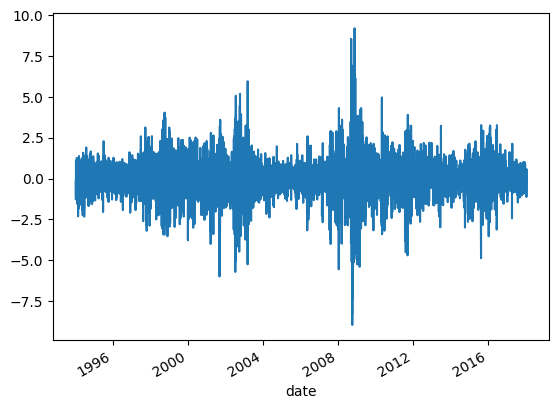

In [32]:
model405_residual.plot()

In [33]:
sts.adfuller(model405_residual)

(-79.17043353369955,
 0.0,
 0,
 6267,
 {'1%': -3.4313938775326336,
  '5%': -2.862001301519361,
  '10%': -2.5670155478252497},
 19003.03877079333)

<font style="font-family:Gabriola; font-size:200%;font-weight:bold;color:#AB63FA;">Evaluating The Error Rate</font><br>

In [34]:
np.sqrt(model405_residual.var())

1.109657962973136

In [35]:
print('ERROR at 99.7% LOS',np.round(3*1.1096523649227494*2,2))

ERROR at 99.7% LOS 6.66


<font style="font-family:Gabriola; font-size:200%;font-weight:bold;color:#AB63FA;"> Testing The Significance Of Lags</font><br>

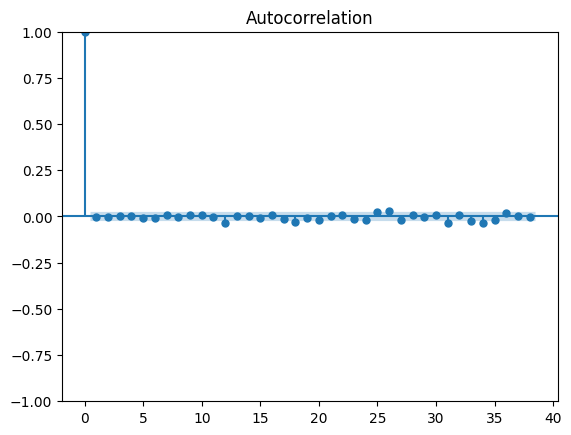

In [36]:
sgt.plot_acf(model_4_0_5.resid)
plt.show()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Modelling Using Auto Arima Package
</div>

In [37]:
model=auto_arima(ftse_return)

In [38]:
model_5_0_2=model_fitting(5,0,2)
summary(model_5_0_2)

                               SARIMAX Results                                
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -9548.804
Date:                Thu, 23 May 2024   AIC                          19115.607
Time:                        11:17:18   BIC                          19176.296
Sample:                             0   HQIC                         19136.636
                               - 6268                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.512      0.131      -0.006       0.044
ar.L1          0.3788      0.077      4.905      0.000       0.227       0.530
ar.L2         -0.4339      0.083     -5.235      0.0

In [39]:
model_5_0_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6268
Model:                 ARIMA(5, 0, 4)   Log Likelihood               -9546.281
Date:                Thu, 23 May 2024   AIC                          19114.563
Time:                        11:17:18   BIC                          19188.738
Sample:                             0   HQIC                         19140.265
                               - 6268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.013      1.470      0.142      -0.006       0.043
ar.L1          0.1828      0.081      2.262      0.024       0.024       0.341
ar.L2         -0.5749      0.082     -7.030      0.000      -0.735      -0.415
ar.L3         -0.1255      0.075     -1.665      0.096      -0.273       0.022
ar.L4          0.3012      0.077      3.935      0.000       0.151       0.451
ar.L5         -0.0865      0.009    -10.064      0.000      -0.103      -0.070
ma.L1         -0.2043      0.081     -2.514      0.012      -0.364      -0.045
ma.L2          0.5339      0.084      6.329      0.000       0.369       0.699
ma.L3          0.0528      0.075      0.704      0.481      -0.094       0.200
ma.L4         -0.2968      0.077     -3.837      0.000      -0.448      -0.145
sigma2         1.2322      0.012    104.137      0.000       1.209       1.255
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              8758.36
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

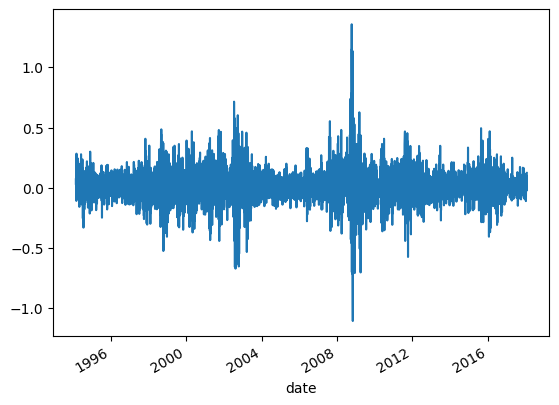

In [40]:
model_5_0_4.predict(30).plot()

<Axes: xlabel='date'>

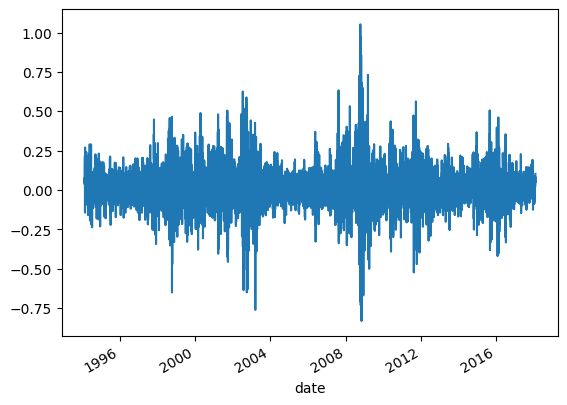

In [41]:
model_5_0_2.predict(30).plot()

<div style="padding: 10px; margin: 0; color: DarkCyan; font-family: cursive, serif; font-size: 120%; text-align: left; border-radius: 15px 50px; overflow: hidden; font-weight: 500;">Thank You For Your Time
</div>
